In [2]:
import sys,os
sys.path.append(os.path.abspath("../"))
sys.path.append(os.path.abspath('../modules/'))

import healpy as h
import multiprocessing as mp
from modules.settings import global_mmf_settings as gset
from data_preprocess import tiling_the_sphere as tts
from data_preprocess import tile_planck_data as tpd
from filters import modular_multi_matched_filter as mmf
from simulate import cluster_templates as cltemp

%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [4]:
dataset="planck_pr3"
whichch="hfi"
mask_point_sources=False
numprocs=35

if whichch=="allch":
    chmin=30.
elif whichch=="hfi":
    chmin=100.

use_psf_data=True
ps_suffix="_inpainted_data"
if mask_point_sources:
    use_psf_data=False
    ps_suffix="_masked_data"
    
    
figstamp=dataset + "_" + whichch + ps_suffix
dir_suffix=whichch + ps_suffix

save_results=False
run_analysis=False

figstamp,dir_suffix

outpath="/results/" + dataset + "/planck_cat_" + dir_suffix + "/"
tempdatapath="/tempdata/" + dataset + "/planck_tiles/"
gset.setup_mmf_config(dataset=dataset,outpath=outpath,tempdatapath=tempdatapath,chmin=chmin,xsize=15.,do_band_pass=True,use_psf_data=use_psf_data)
figpath=gset.mmfset.paths["result_figs"]
datapath=gset.mmfset.paths["result_data"]

In [5]:
tile_map,fsky_map,apo_mask=tts.return_sky_tile_map()
tiledef=tpd.get_tangent_plane_fnames(fsky_map=fsky_map,fsky_thr=0.3)

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


In [24]:
from automated_detection.extract_tile_cluster_catalogue import read_dict
from automated_detection.extract_tile_cluster_catalogue import return_final_cluster_catalogue
from automated_detection.extract_tile_cluster_catalogue import return_distance

In [4]:
# remote_res_path="/scratch/nas_chluba/specdist/arotti/mmf_dataout/results/planck_pr3/planck_cat_hfi_inpainted_data/15deg_patches/data/"
# len(gset.mmfset.result_path)

# def return_scp_cmd(px):
#     base_cmd="scp arotti@sirius5:" + remote_res_path
#     cmd= base_cmd + tiledef[px]["CATNAME"][len(gset.mmfset.result_path)+6:] + " " + gset.mmfset.result_path + "/data/"
#     return cmd

# for px in tiledef.keys():
#     cmd=return_scp_cmd(px)
#     os.system(cmd)

<IPython.core.display.Javascript object>


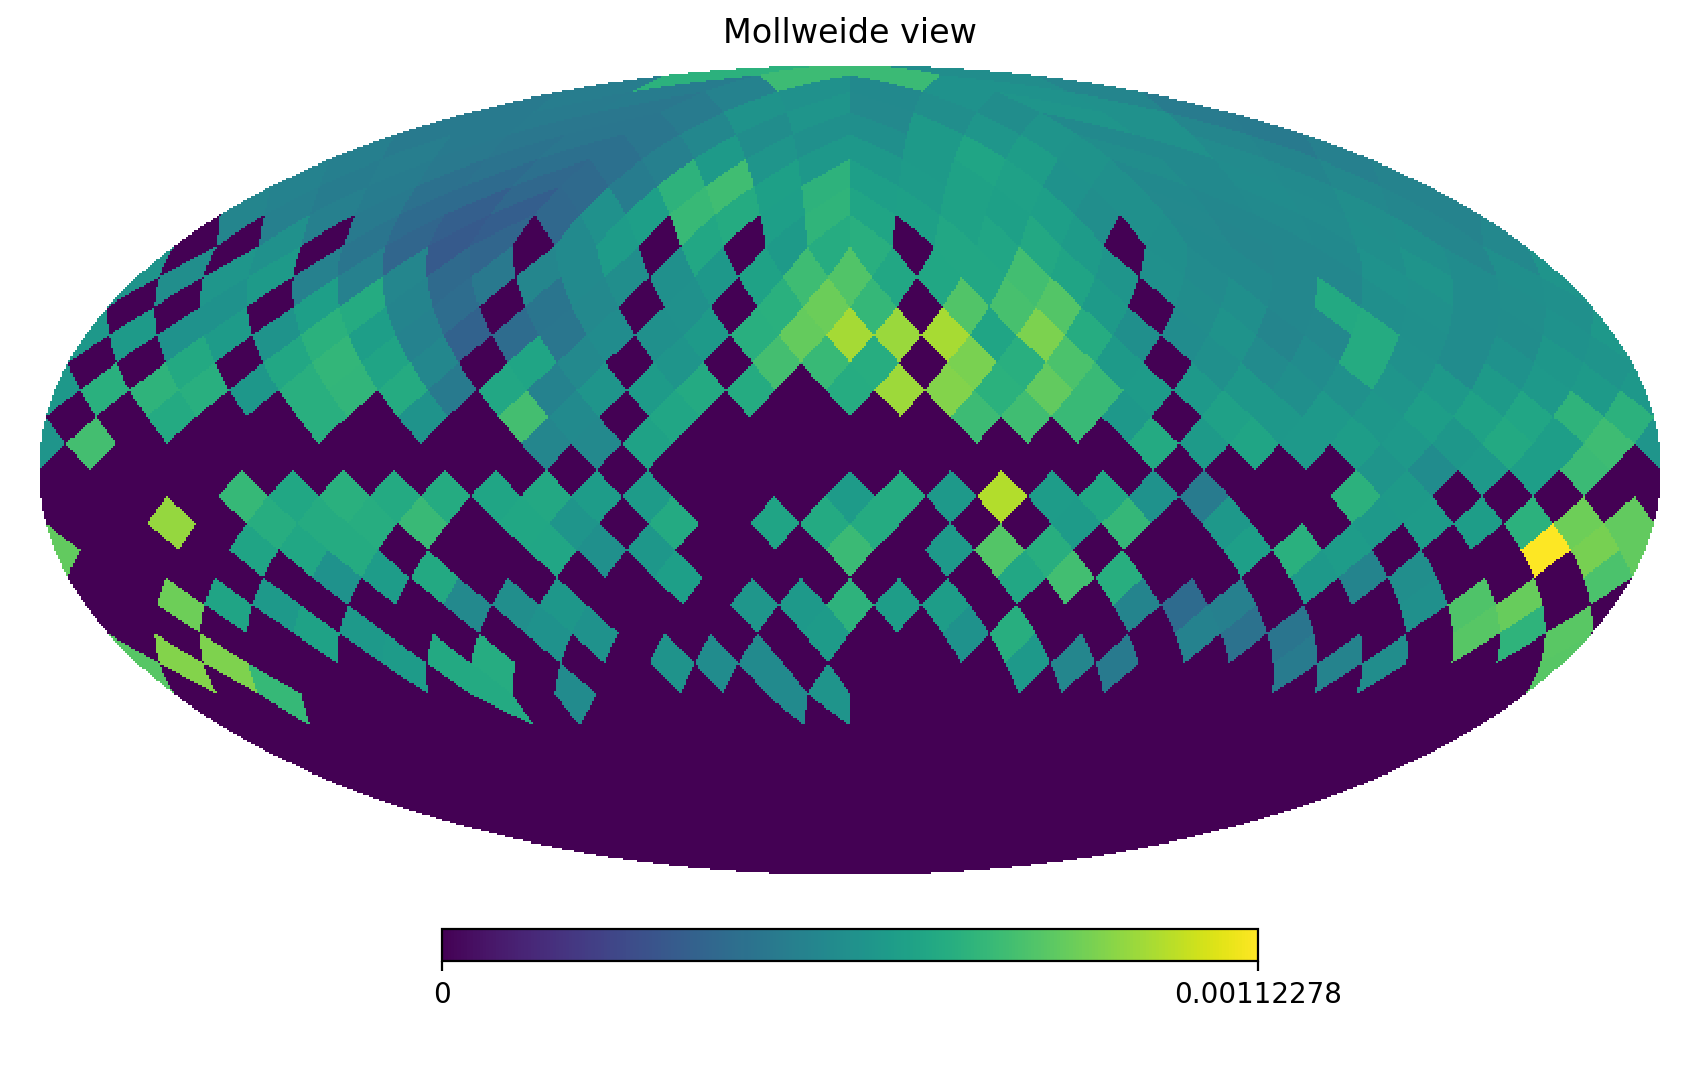

In [37]:
noise_map=np.zeros((h.nside2npix(8),51))

for px in tiledef.keys():
    if os.path.isfile(tiledef[px]["CATNAME"]):
        tcat=read_dict(tiledef[px]["CATNAME"])
        for ith,th in enumerate(tcat["theta500"]):
            noise_map[px,ith]=tcat["err_Y500"][ith]

<IPython.core.display.Javascript object>


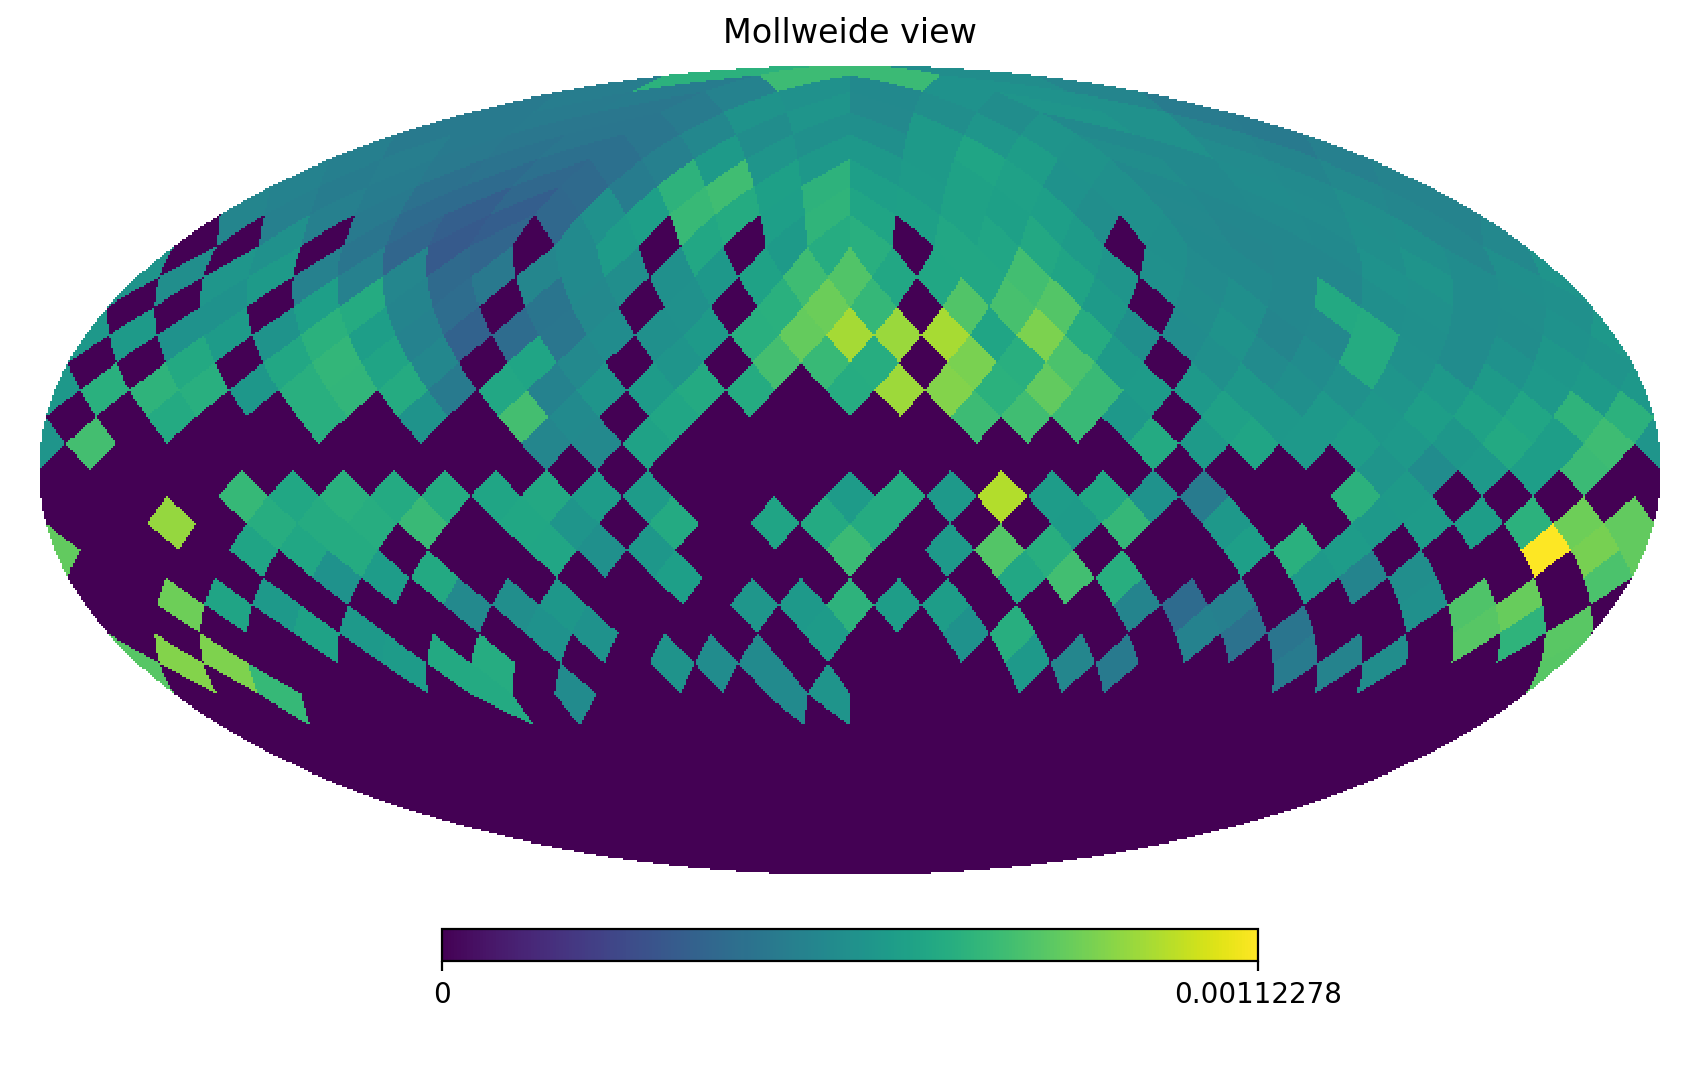

In [38]:
h.mollview(noise_map[:,40])

In [41]:
temptiledef={}
for px in tiledef.keys():
    if os.path.isfile(tiledef[px]["CATNAME"]):
            temptiledef[px]=tiledef[px]

In [42]:
sum_cat=return_final_cluster_catalogue(temptiledef)

In [10]:
sum_cat["Total clusters"]

4725

In [19]:
mp_snr=np.array([])
for k in sum_cat["Catalogue"].keys():
    mp_snr=np.append(mp_snr,sum_cat["Catalogue"][k]["mp_snr"])

In [34]:
len(mp_snr[mp_snr>=8])

249

In [35]:
dist={}
for idx in sum_cat["Catalogue"].keys():
    dist[idx]=[]
    for jdx in sum_cat["Catalogue"].keys():
        galcoord1=sum_cat["Catalogue"][idx]["mp_gal_coord"]
        galcoord2=sum_cat["Catalogue"][jdx]["mp_gal_coord"]
        dist[idx]=dist[idx] + [return_distance(galcoord1,galcoord2)]

In [36]:
for idx in sum_cat["Catalogue"].keys():
    print sort(dist[idx])[1:6]/sum_cat["Catalogue"][idx]["mp_thetac"]

[5.83937537 6.12638446 6.74832659 6.81353972 6.90071336]
[2.62771993 3.58887118 4.55764878 4.670624   5.16480223]
[ 8.1231634   9.77681573 10.61116073 10.74281678 11.31256588]
[ 0.21249812  4.63339186  5.32850467  8.77661717 10.74081582]
[ 2.24939144  3.29430221  6.0716231  11.92906344 12.56871608]
[7.62730397 8.43214431 8.48895601 9.25573572 9.4896514 ]
[24.00034548 25.17939609 41.40278281 43.8375036  45.28894415]
[72.00103643 74.47177619 75.89910295 78.86318468 83.50344405]
[12.94065421 12.99259781 18.08486261 18.78750154 25.07238339]
[ 3.68635329  7.54798714  9.94580512 13.48237348 16.89986392]
[ 76.20387807  80.66746128 151.33377916 167.28157745 176.79197743]
[17.59826832 17.8100911  20.71334345 35.71972888 35.94478973]
[13.37571506 19.01428925 21.19866322 21.23151297 22.16461936]
[  1.1930537   93.37851616  96.68535099 129.7487526  152.44165183]
[20.42274486 26.66377349 31.58105534 34.86585357 38.94165031]
[16.79695867 24.8239254  25.17939609 27.44168208 29.24122688]
[ 7.57618723 